In [54]:
from pathlib import Path
import sys

if (root := str(Path().resolve().parent.parent / "python")) not in sys.path:
    sys.path.append(root)
print(*sys.path, sep="\n")

import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from rfdsppy import continuous_time as conttime, plotting, mixed_signal
import mplcursors

from importlib import reload

reload(conttime)
reload(plotting)
reload(mixed_signal)

%matplotlib ipympl
# %matplotlib inline

/usr/lib/python312.zip
/usr/lib/python3.12
/usr/lib/python3.12/lib-dynload

/home/ryanwtsai/repos/rfdsp_sim/python/venv/lib/python3.12/site-packages
/home/ryanwtsai/repos/rfdsp_sim/python


In [60]:
dac = mixed_signal.DAC(2, fs_eq=0.5)
n_taps_eq=2**12
dac.fit(n_taps_eq=n_taps_eq)
_, h_eq = signal.freqz(dac.eq_taps_, 1, worN=dac.f_, fs=2)

/tmp/ipykernel_135836/3515971082.py:2: RuntimeWarning: divide by zero encountered in log10
  ax.plot(dac.f_, 20*np.log10(dac.g_), label="Desired Eq")


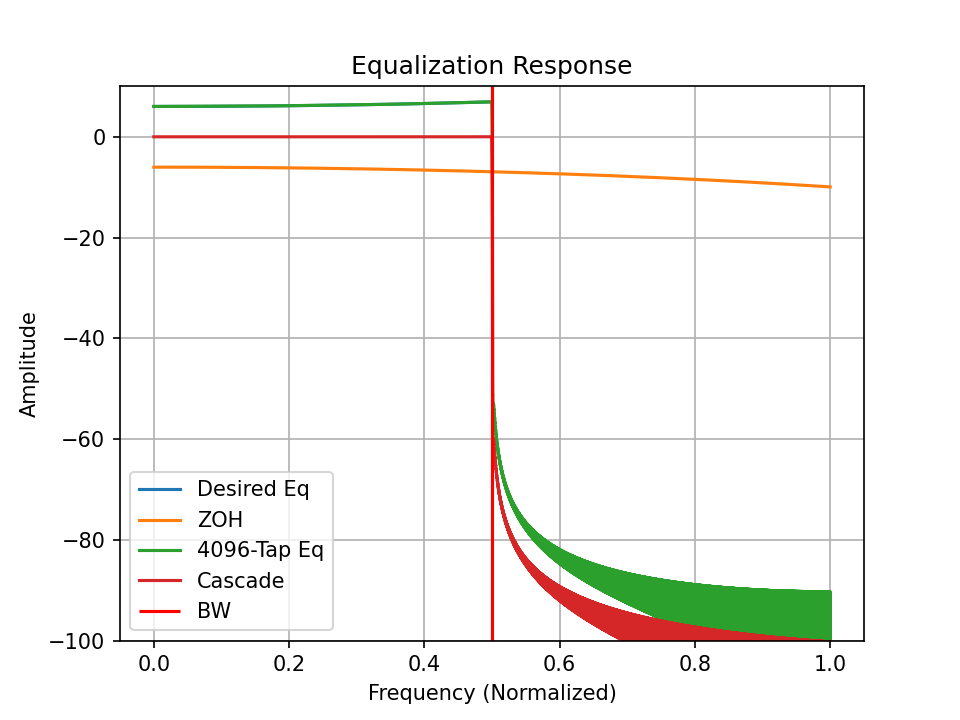

In [61]:
fig, ax = plt.subplots(dpi=150)
ax.plot(dac.f_, 20*np.log10(dac.g_), label="Desired Eq")
ax.plot(dac.f_, 20*np.log10(dac.g_zoh_), label="ZOH")
ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)), label=f"{n_taps_eq}-Tap Eq")
ax.plot(dac.f_, 20*np.log10(np.abs(h_eq)*dac.g_zoh_), label="Cascade")
ax.grid()
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequency (Normalized)")
ax.set_title("Equalization Response")
ax.set_ylim(bottom=-100, top=10)
ax.vlines(dac.fs_eq_, ymin=-100, ymax=10, colors="r", label="BW")
ax.legend()

mplcursors.cursor(ax)

In [71]:
eq_taps[:20]

array([-4.27534446e-09,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -3.06990907e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.78317035e-08,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.07243330e-05,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

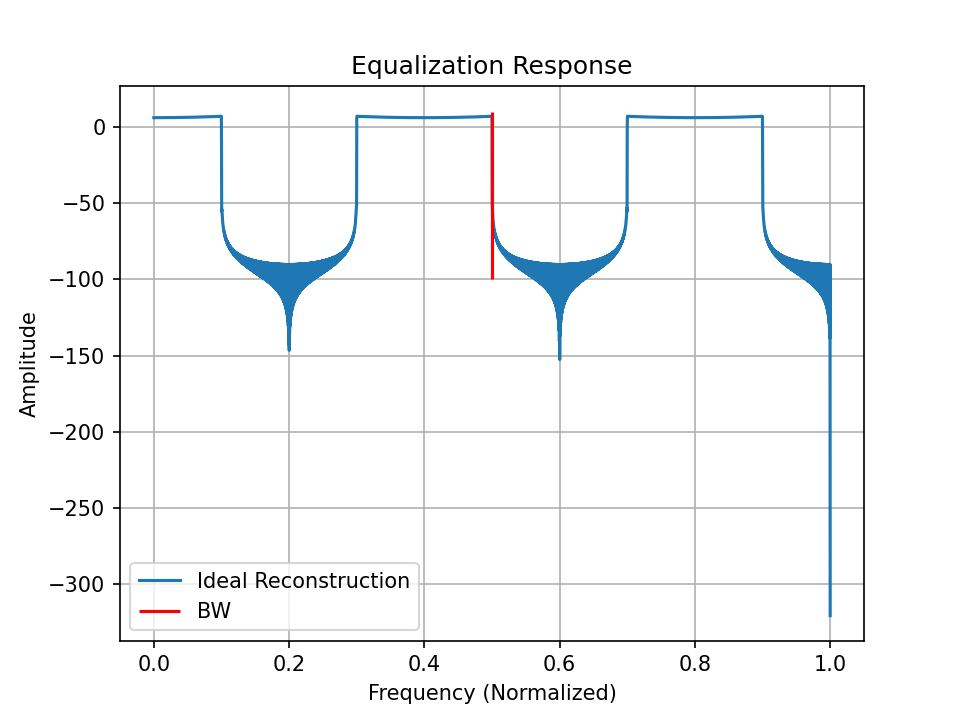

In [75]:
eq_taps = np.zeros(len(dac.eq_taps_)*dac.osr, dtype=dac.eq_taps_.dtype)
eq_taps[::dac.osr] = dac.eq_taps_
b_ideal = np.convolve(dac.zoh_, eq_taps) # Can't do this directly - these taps are at different sampling rates - you need to insert zeros into eq_taps_ I think
b_ideal = eq_taps
_, h_ideal = signal.freqz(b_ideal, 1, worN=dac.f_, fs=2)

fig, ax = plt.subplots(dpi=150)
ax.plot(dac.f_, 20*np.log10(np.abs(h_ideal)), label="Ideal Reconstruction")
ax.grid()
ax.set_ylabel("Amplitude")
ax.set_xlabel("Frequency (Normalized)")
ax.set_title("Equalization Response")
# ax.set_ylim(bottom=-100, top=10)
ax.vlines(dac.fs_eq_, ymin=-100, ymax=10, colors="r", label="BW")
ax.legend()

# mplcursors.cursor(ax)

<StemContainer object of 3 artists>

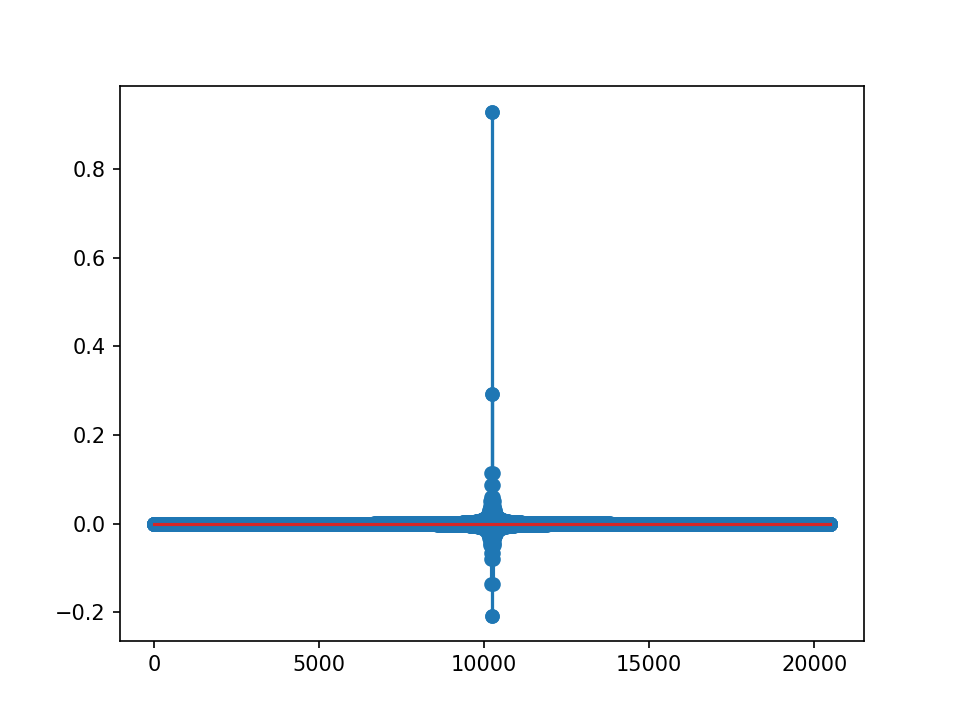

In [76]:
fig, ax = plt.subplots(dpi=150)
ax.stem(b_ideal)